**Fire Detection using Image processing** 

In [1]:
#importing libraries:
import os  
import cv2                                   
import numpy as np                            
from PIL import Image                # Python image library 
import matplotlib.pyplot as plt      # For data Visualization-plots
%matplotlib inline 
from IPython.display import display  # For display

import warnings                      # To ignore unnecessary python warnings 
warnings.filterwarnings('ignore')

In [2]:
# Here we are using VGG16 model
from keras.applications import VGG16                                            
from keras.callbacks import ModelCheckpoint                # further to train the saved model 
from keras import models, layers, optimizers               # building DNN
from tensorflow.keras.models import load_model             # To load saved model 
from keras.preprocessing.image import ImageDataGenerator     
from imutils import paths 

In [3]:
#classes = 2
conv_layer = VGG16(weights='imagenet',             # Base layer
                 include_top=False,
                 input_shape=(128, 128, 3))

model = models.Sequential()
model.add(conv_layer)
model.add(layers.Flatten())
#model.add(layers.Dense(classes))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

conv_layer.trainable = False

model.compile(loss='binary_crossentropy', 
             optimizer=optimizers.RMSprop(lr=1e-4), 
             metrics=['accuracy'])

58892288/58889256 [==============================] - 0s 0us/step


In [4]:
# checking summary:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               2097408   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 2,097,665
Non-trainable params: 14,714,688
_________________________________________________________________


In [5]:
# Mounting drive:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [6]:
# Preparing Data:
# I'm having two folders. One for testing and other for training. 
train_path = '/content/drive/MyDrive/RWDS/Train'
train_fire = '/content/drive/MyDrive/RWDS/Train/train_fire'
train_nofire ='/content/drive/MyDrive/RWDS/Train/train_nofire'
test_path = '/content/drive/MyDrive/RWDS/Test'
test_fire ='/content/drive/MyDrive/RWDS/Test/test_fire'
test_nofire ='/content/drive/MyDrive/RWDS/Test/test_nofire'
#Classes = ["No-Fire", "Fire"]

In [7]:
Train_datagen = ImageDataGenerator(rescale=1./255, 
                                  rotation_range=40,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True)

Test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = Train_datagen.flow_from_directory(train_path, 
                                                   target_size=(150, 150), 
                                                   batch_size=32,
                                                   class_mode='binary')

test_generator = Test_datagen.flow_from_directory(test_path, 
                                                   target_size=(150, 150), 
                                                   batch_size=32,
                                                   class_mode='binary')


Found 3123 images belonging to 2 classes.
Found 839 images belonging to 2 classes.


In [8]:
H = model.fit(train_generator, epochs=30, 
                     validation_data=test_generator)

Epoch 1/30
98/98 [==============================] - 1330s 13s/step - loss: 0.5062 - accuracy: 0.7489 - val_loss: 0.2921 - val_accuracy: 0.8808
Epoch 2/30
98/98 [==============================] - 58s 593ms/step - loss: 0.3152 - accuracy: 0.8655 - val_loss: 0.3276 - val_accuracy: 0.8474
Epoch 3/30
98/98 [==============================] - 58s 592ms/step - loss: 0.2608 - accuracy: 0.8959 - val_loss: 0.3150 - val_accuracy: 0.8570
Epoch 4/30
98/98 [==============================] - 58s 590ms/step - loss: 0.2725 - accuracy: 0.8806 - val_loss: 0.3501 - val_accuracy: 0.8451
Epoch 5/30
98/98 [==============================] - 58s 592ms/step - loss: 0.2530 - accuracy: 0.8864 - val_loss: 0.3458 - val_accuracy: 0.8498
Epoch 6/30
98/98 [==============================] - 58s 587ms/step - loss: 0.2353 - accuracy: 0.8975 - val_loss: 0.2650 - val_accuracy: 0.8868
Epoch 7/30
98/98 [==============================] - 57s 588ms/step - loss: 0.2322 - accuracy: 0.9025 - val_loss: 0.2483 - val_accuracy: 0.8903

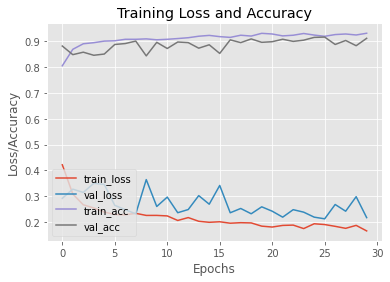

In [9]:
N = np.arange(0, 30)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, H.history["loss"], label="train_loss")
plt.plot(N, H.history["val_loss"], label="val_loss")
plt.plot(N, H.history["accuracy"], label="train_acc")
plt.plot(N, H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")

In [10]:
model.save('Optimized_model.h5') 

INFO:tensorflow:Assets written to: Optimized_model/assets
